In [1]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Dataset: "iris"

In [11]:
# Import Example Data
DF = sns.load_dataset("iris")

DF = DF.reset_index(names="subject")
DF = DF.melt(
    id_vars=["subject", "species"],
    var_name="measurement",
    value_name="length",
)
DF["leaf"] = DF["measurement"].str.split("_").str[0]
DF["orientation"] = DF["measurement"].str.split("_").str[1]
DF

,subject,species,measurement,length,leaf,orientation
0,0,setosa,sepal_length,5.1,sepal,length
1,1,setosa,sepal_length,4.9,sepal,length
2,2,setosa,sepal_length,4.7,sepal,length
3,3,setosa,sepal_length,4.6,sepal,length
4,4,setosa,sepal_length,5.0,sepal,length
...,...,...,...,...,...,...
595,145,virginica,petal_width,2.3,petal,width
596,146,virginica,petal_width,1.9,petal,width
597,147,virginica,petal_width,2.0,petal,width
598,148,virginica,petal_width,2.3,petal,width


In [12]:
dims = dict(
    y="length",
    x="species",
    hue="orientation",
    col="leaf",
)
DA3 = plst.DataAnalysis(DF, dims, subject="subject", verbose=True)
# DA.catplot(dodge=True)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (12 total) have the same samplesize n = 50.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['leaf', 'orientation'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


In [13]:
DA3.check_normality()  # -> normal

In [ ]:
DA3.check_homoscedasticity()

In [16]:
_ = DA3.test_pairwise(paired=False, parametric=True)

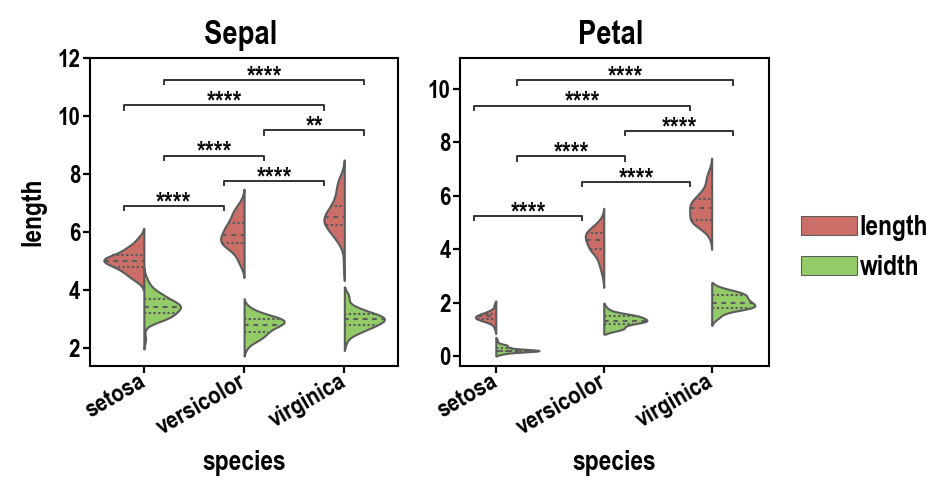

In [17]:
(
    DA3.subplots(figsize=(4, 2), sharey=False, wspace=0.2)
    .fillaxes(
        kind="violin",
        split=True,
        inner="quart",
    )
    .edit_x_ticklabels_rotate(30)
    .annotate_pairwise(
        include="__X",
    )
    .edit_legend(title="")
)
plt.savefig("iris1.png", dpi=300, bbox_inches="tight")